In [8]:
#import random
import torch as tc
import numpy as np
import qutip as qt
import pandas as pd
import function as my
import matplotlib.pyplot as plt

from tqdm import tqdm

ModuleNotFoundError: No module named 'function'

In [7]:
# Carregar os arquivos CSV
sx_data = pd.read_csv('sx.csv')
sy_data = pd.read_csv('sy.csv')
sz_data = pd.read_csv('sz.csv')
Ndata = 150
sx_data_sorted = sx_data.sort_values(by=sx_data.columns[0])
sy_data_sorted = sy_data.sort_values(by=sy_data.columns[0])
sz_data_sorted = sz_data.sort_values(by=sz_data.columns[0])

sx_data = tc.tensor(sx_data_sorted.iloc[:Ndata, 1].values).view(-1,1)
sy_data = tc.tensor(sy_data_sorted.iloc[:Ndata, 1].values).view(-1,1)
sz_data = tc.tensor(sz_data_sorted.iloc[:Ndata, 1].values).view(-1,1)

valor_esperado_data = tc.cat((sx_data, sy_data, sz_data), dim=1)
time_dataX = tc.tensor(sx_data_sorted.iloc[:Ndata, 0].values,dtype=tc.float).view(-1,1)
time_dataY = tc.tensor(sy_data_sorted.iloc[:Ndata, 0].values,dtype=tc.float).view(-1,1)
time_dataZ = tc.tensor(sz_data_sorted.iloc[:Ndata, 0].values,dtype=tc.float).view(-1,1)

FileNotFoundError: [Errno 2] No such file or directory: 'sx.csv'

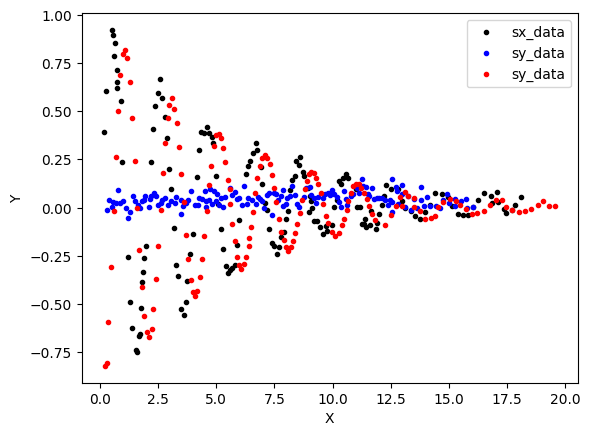

In [ ]:

# Plotando as curvas de sy_data
plt.plot(sx_data_sorted.iloc[:Ndata, 0],sx_data_sorted.iloc[:Ndata, 1],"k.", label='sx_data')
plt.plot(sy_data_sorted.iloc[:Ndata, 0],sy_data_sorted.iloc[:Ndata, 1],"b.", label='sy_data')
plt.plot(sz_data_sorted.iloc[:Ndata, 0],sz_data_sorted.iloc[:Ndata, 1],"r.", label='sy_data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


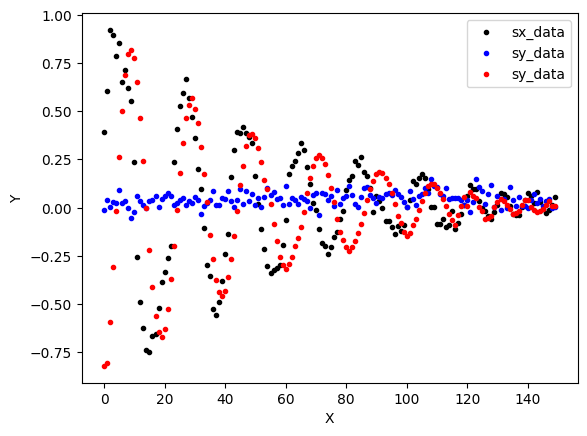

In [ ]:

# Plotando as curvas de sy_data
plt.plot(valor_esperado_data[:,0],"k.", label='sx_data')
plt.plot(valor_esperado_data[:,1],"b.", label='sy_data')
plt.plot(valor_esperado_data[:,2],"r.", label='sy_data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
# def data_qubit(lista_J,dissipation,tfinal,N,O_op,device="cpu"):
#     # Operadores de Pauli para cada qubit
#     X,Y,Z =qt.sigmax(),qt.sigmay(),qt.sigmaz()

#     operadores = [X,Y,Z]

#     H = 0
#     for i in range(len(lista_J)):
#         H += lista_J[i]*operadores[i]

#     # Hamiltonian Lindbladian
#     c_ops = [np.sqrt(dissipation[0])*qt.sigmam(),
#              np.sqrt(dissipation[1])*qt.sigmaz(),
#              np.sqrt(dissipation[2])*qt.sigmam().dag()]

#     # Estado inicial (cada qubit na superposição de |0> e |1>)
#     theta1  = np.pi/4
#     phi1    = 0.0
#     ket_plus1 = (np.cos(theta1)*qt.basis(2, 0)+np.sin(theta1)*np.exp(1j*phi1)*qt.basis(2, 1))

#     # |+> = (|0> + |1>)/sqrt(2)
#     psi0    = ket_plus1

#     # Lista de tempos para a evolução
#     tlist   = np.linspace(0.0, tfinal, N)

#     # Solução da equação de Schrödinger
#     options = qt.Options(nsteps = 100000, atol = 1e-14, rtol = 1e-14)
#     result  = qt.mesolve(H, psi0, tlist, c_ops=c_ops, e_ops=O_op,options=options)

#     expect  = tc.tensor( np.array( result.expect),device = device).transpose(0, 1)
#     return expect

# O_op =[ qt.sigmax(),
#         qt.sigmay(),
#         qt.sigmaz()]


In [ ]:
# Js          = np.random.uniform(-1,1,3)
# dissipation = np.random.uniform(0,1,3)
# tfinal      = 2*np.pi
# N           = 100

#valor_esperado_data  = data_qubit(Js,dissipation,tfinal,N,O_op,device="cpu")

# for i in range(len(O_op)):
#     plt.plot(valor_esperado_data[:,i].cpu() ,label=f"O_{i}")

# plt.legend()
# plt.show()
# print(Js,dissipation)

In [ ]:
tfinal      = 20
N           = 1000

O_op =[ qt.sigmax(),
        qt.sigmay(),
        qt.sigmaz()]

In [ ]:
neuronio = [30,30]
X_vector   = my.Rede(
    neuronio    = neuronio,
    input_      = 1,
    output_     = len(O_op),
    activation  =[tc.nn.Tanh()]*len(neuronio),
    creat_p     =True,
    N_of_paramater= 6)
opt = tc.optim.Adam(X_vector.parameters(),
        lr = 0.001 )
time =  tc.linspace(
        0,
        tfinal,
        N,
        dtype   = tc.float32,
        requires_grad = True).reshape((-1, 1))
#index_data = np.random.randint(0,N,size=100)
X_vector.parametro

Parameter containing:
tensor([0.4460, 0.0802, 0.5950, 0.0740, 0.0969, 0.1485], requires_grad=True)

100%|██████████| 20000/20000 [04:00<00:00, 83.09it/s]


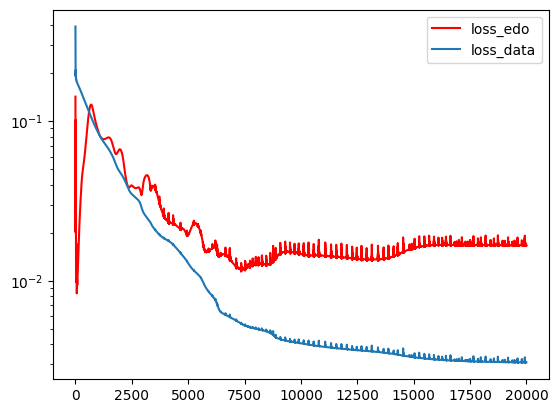

Valor final: Parameter containing:
tensor([ 0.0257, -1.5557, -0.0146, -0.0195,  0.2481, -0.0729],
       requires_grad=True)


In [ ]:
epocas  = 20000
LOSS    = []
LOSS1   = []
LOSS2   = []
hisorty_of_param = []
for _ in tqdm(range(epocas)):
    ####### Forward pass #######
    y  = X_vector(time)

    ######## Los edo #######
    dX_dt = []
    for i in range(y.shape[1]):
        dX_dt.append(tc.autograd.grad(outputs = y[:, i],
                                    inputs = time,
                                    grad_outputs = tc.ones_like(y[:, i]),
                                    #retain_graph = True,
                                    create_graph = True)[0])
    dX_dt   = tc.cat(dX_dt, dim=1)

    X,Y,Z = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    JX,JY,JZ,gamma1,gamma2,gamma3 = X_vector.parametro

    LOSS_edo  = 0
    LOSS_edo += (dX_dt[:,0:1] - ( + (-0.5*gamma1 - 2.0*gamma2 - 0.5*gamma3)*X + (-2.0*JZ)*Y + (2.0*JY)*Z))**2
    LOSS_edo += (dX_dt[:,1:2] - ( + (2.0*JZ)*X + (-0.5*gamma1 - 2.0*gamma2 - 0.5*gamma3)*Y + (-2.0*JX)*Z))**2
    LOSS_edo += (dX_dt[:,2:3] - ( + (-1.0*gamma1 + 1.0*gamma3) + (-2.0*JY)*X + (2.0*JX)*Y + (-1.0*gamma1 - 1.0*gamma3)*Z))**2
    LOSS_edo = LOSS_edo.mean()

    ####### loss data(expected values) #######
    ####### Forward pass #######
    y  = X_vector(time_dataX)
    LOSS_data = tc.mean((y[:,:1]  - valor_esperado_data[:,:1])**2)

    y  = X_vector(time_dataY)
    LOSS_data += tc.mean((y[:,1:2]  - valor_esperado_data[:,1:2])**2)

    y  = X_vector(time_dataZ)
    LOSS_data += tc.mean((y[:,2:3]  - valor_esperado_data[:,2:3])**2)
    ####### Loss total #######
    loss_i = LOSS_edo*0.01 + LOSS_data

    ####### Backpropagation #######
    opt.zero_grad()
    loss_i.backward()
    opt.step()
    LOSS1.append(LOSS_edo.cpu().detach().numpy())
    LOSS2.append(LOSS_data.cpu().detach().numpy())
    LOSS.append(loss_i.cpu().detach().numpy())

#plt.plot(LOSS,"k.",label="loss_total")
plt.plot(LOSS1,'r-',label="loss_edo")
plt.plot(LOSS2,label="loss_data")
plt.yscale("log")
plt.legend()
plt.show()
print("Valor final:",X_vector.parametro)

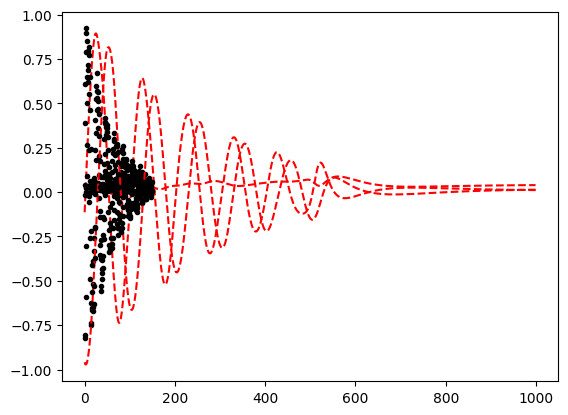

In [ ]:

X_vector.eval()
X_  = X_vector(time).detach().numpy()

for i in range(len(O_op)):
    plt.plot(X_[:,i],"r--")
    plt.plot(valor_esperado_data[:,i].cpu(),"k." ,label=f"O_{i}")


# plt.plot(X_[:,3],"--",label="sigmaI_Y")

#plt.legend()
plt.show()
#abs(X_vector.parametro -tc.tensor(np.concatenate((Js, dissipation))))

In [ ]:
print("Omega: ",np.pi/2, " obtido: ",X_vector.parametro[1].item())
print("T1 : ", 1/15 )
print("Td : ", 1/5 )
print("Tphi : ", 1/17.9 )

Omega:  1.5707963267948966  obtido:  -1.5557185411453247
T1 :  0.06666666666666667
Td :  0.2
Tphi :  0.0558659217877095
